In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('amazon_alexa.tsv', delimiter = '\t')

In [4]:
dataset.head()
dataset.shape

(3150, 5)

In [5]:
dataset['variation'].value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

### checking for null values

In [6]:
dataset.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [7]:
dataset[dataset['verified_reviews'] .isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [8]:
dataset.dropna()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


### calculating the length of the reviews

In [9]:
dataset['length'] = dataset['verified_reviews'].astype('str').apply(len)

In [10]:
dataset.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


### Rating column

In [11]:
print(f"Rating count: \n {dataset['rating'].value_counts()}")

Rating count: 
 rating
5    2286
4     455
1     161
3     152
2      96
Name: count, dtype: int64


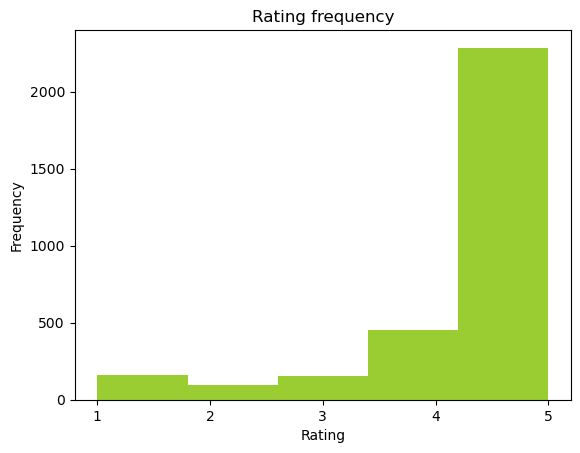

In [12]:
dataset['rating'].plot.hist(color='yellowgreen',bins=5)
plt.xticks([1,2,3,4,5])
plt.title('Rating frequency')
plt.xlabel('Rating')
plt.ylabel("Frequency")
plt.show()

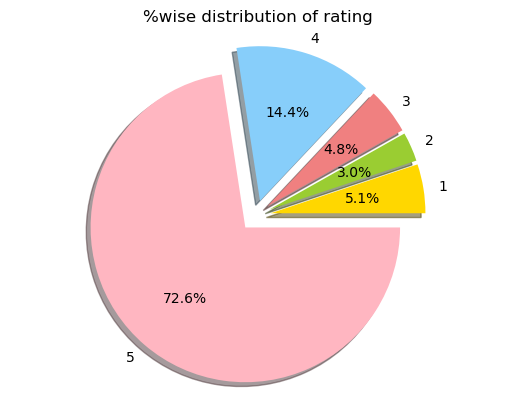

In [13]:
labels = ['1','2','3','4','5']
sizes = [161,96,152,455,2286]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','lightpink']
explode = (0.1, 0.1, 0.1, 0.1, 0.1)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True) 
plt.title('%wise distribution of rating')
plt.axis('equal')
plt.show()


### Feedback Column

In [14]:
print(f"Feedback Frequency: \n{dataset['feedback'].value_counts()}")

Feedback Frequency: 
feedback
1    2893
0     257
Name: count, dtype: int64


In [15]:
review_0 = dataset[dataset['feedback'] == 0].iloc[1]['verified_reviews']
print(review_0)
review_1 = dataset[dataset['feedback'] == 1].iloc[1]['verified_reviews']
print(review_1)
# this tells us that 1 feedbacks are positive and 0 feedbacks are negative

Sound is terrible if u want good music too get a bose
Loved it!


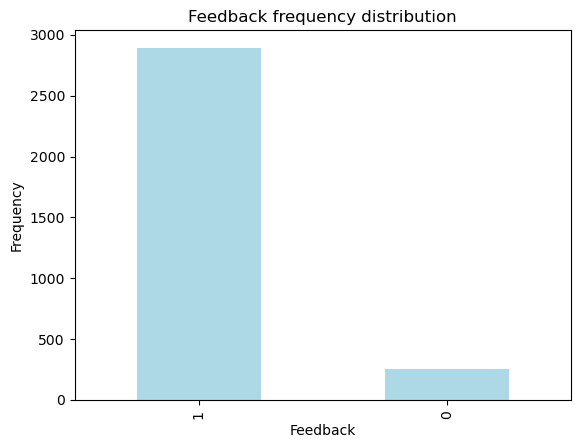

In [16]:
dataset['feedback'].value_counts().plot.bar(color = 'lightblue')
plt.title('Feedback frequency distribution')
plt.xlabel('Feedback')
plt.ylabel('Frequency')
plt.show()

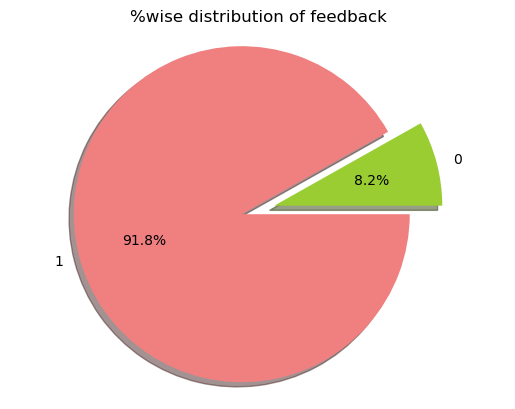

In [17]:
labels = ['0','1']
sizes = [257,2893]
colors = ['yellowgreen', 'lightcoral']
explode = (0.1, 0.1)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True) 
plt.title('%wise distribution of feedback')
plt.axis('equal')
plt.show()


In [18]:
dataset[dataset['feedback']==0]['rating'].value_counts()

rating
1    161
2     96
Name: count, dtype: int64

In [19]:
dataset[dataset['feedback']==1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

### So when the feedback is 0, ratings are 1 and 2. And when feedback is 1, ratings are 3,4,5.

### Variation Column

In [20]:
print(f"Different variations of amazon echo: \n{dataset['variation'].value_counts()}")

Different variations of amazon echo: 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


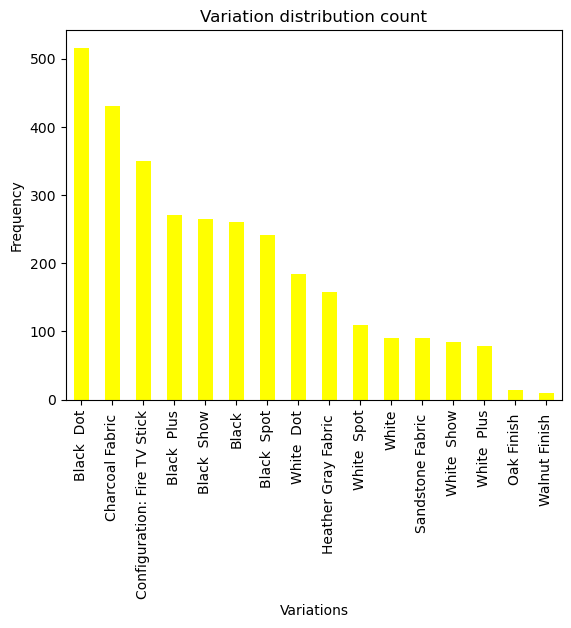

In [21]:
dataset['variation'].value_counts().plot.bar(color='yellow')
plt.xlabel('Variations')
plt.ylabel('Frequency')
plt.title('Variation distribution count')
plt.show()

In [22]:
dataset.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.142857
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

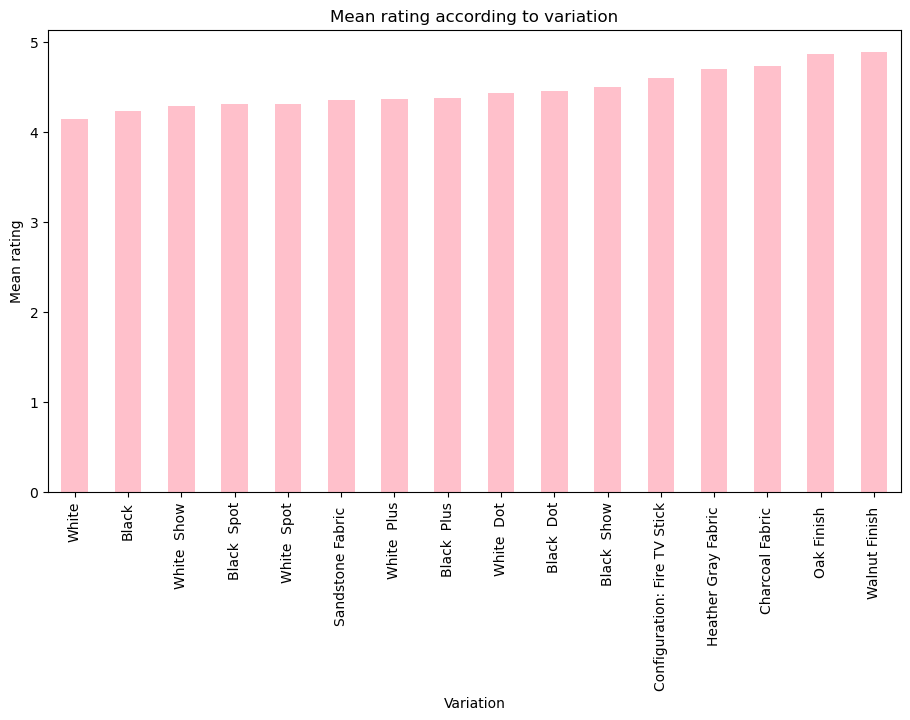

In [23]:
dataset.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'pink', figsize=(11, 6))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

### length analysis

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

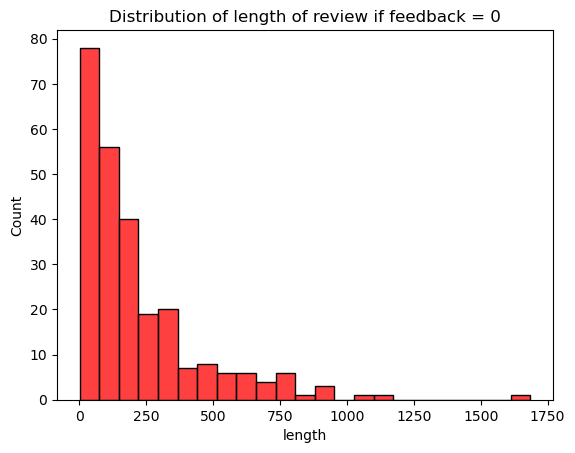

In [24]:
sns.histplot(dataset[dataset['feedback']==0]['length'],color='red').set(title='Distribution of length of review if feedback = 0')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

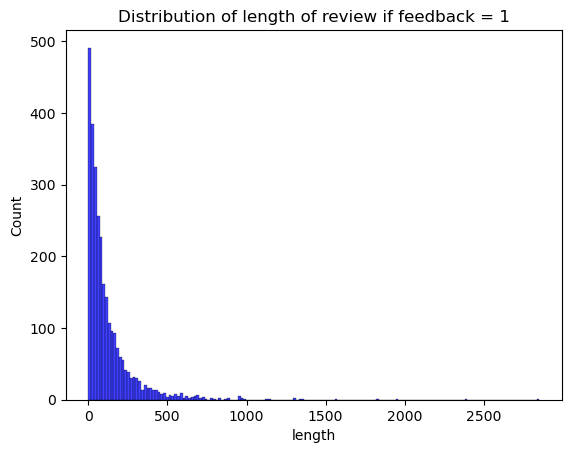

In [25]:
sns.histplot(dataset[dataset['feedback']==1]['length'],color='blue').set(title='Distribution of length of review if feedback = 1')

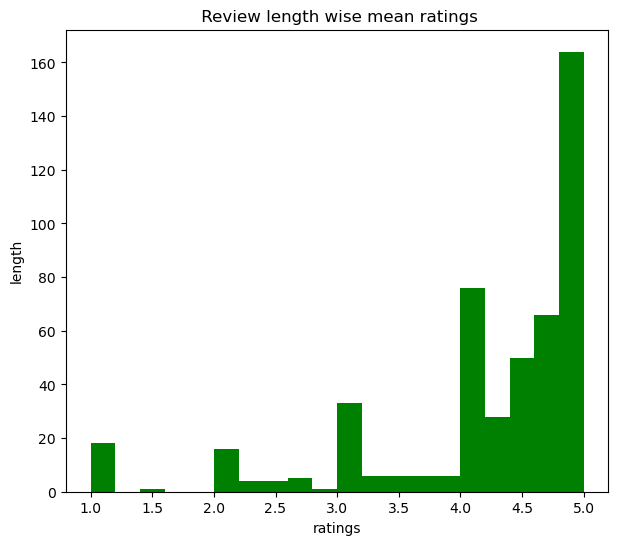

In [26]:
dataset.groupby('length')['rating'].mean().plot.hist(color = 'green', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

In [27]:
import nltk
import re
import pickle

In [28]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

### Data preprocessing and cleaning

In [29]:
wordnet = WordNetLemmatizer()
corpus = []

In [30]:
# data cleaning and pre processing
for i in range (0,dataset.shape[0]):
    rev = re.sub('^a-zA-Z', ' ',dataset['verified_reviews'].astype('str')[i])
    rev = rev.lower()
    rev = rev.split()
    rev = [wordnet.lemmatize(word)for word in rev if word not in set(stopwords.words('english'))]
    rev = ' '.join(rev)
    corpus.append(rev)    

In [31]:
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray() #independent feature
y = dataset['feedback'].values #dependent feature

In [32]:
pickle.dump(cv, open('sentimental_analysis_models/countVectorizer.pkl', 'wb'))

### Model Building

In [33]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

In [36]:
# Oversampling 
os = RandomOverSampler(random_state = 42)
X_res, y_res = os.fit_resample(X, y)

In [37]:
print(X_res.shape)
print(y_res.shape)

(5786, 3877)
(5786,)


In [39]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [40]:
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier

In [41]:
scaler = MinMaxScaler()
X_train_new = scaler.fit_transform(X_res)
X_test_new = scaler.transform(X_test)

In [42]:
pickle.dump(scaler, open('sentimental_analysis_models/scaler.pkl', 'wb'))

In [44]:
xgb = XGBClassifier()
xgb.fit(X_train_new, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,precision_score,recall_score,f1_score
y_pred_prob = xgb.predict_proba(X_test_new)[:,1]
threshold = 0.3
y_pred = (y_pred_prob >= threshold).astype(int)

In [46]:
print("Training Accuracy :", xgb.score(X_train_new, y_res))
print("Testing Accuracy :", xgb.score(X_test_new, y_test))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Training Accuracy : 0.9541997926028344
Testing Accuracy : 0.9809523809523809
Precision:  0.9885974914481186
Recall:  0.997698504027618
F1 Score:  0.993127147766323


In [47]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 66,  10],
       [  2, 867]])

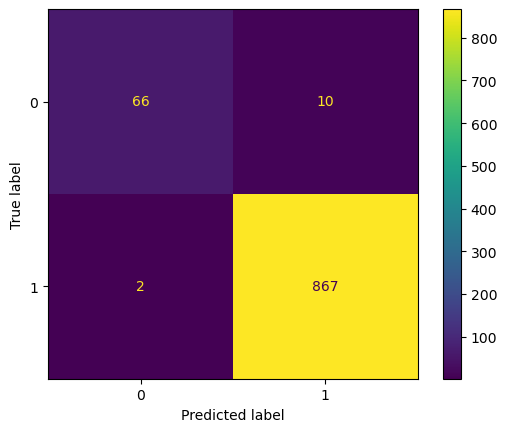

In [48]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb.classes_)
cm_display.plot()
plt.show()

In [49]:
pickle.dump(xgb, open('sentimental_analysis_models/xgb.pkl', 'wb'))

In [50]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [51]:
from wordcloud import WordCloud

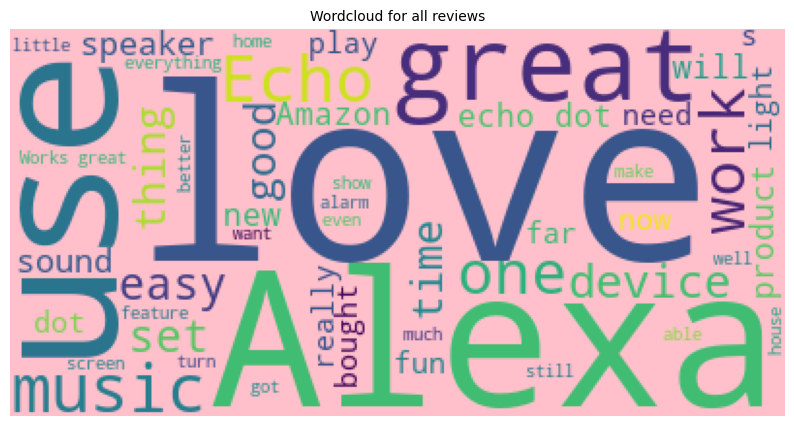

In [52]:
reviews = " ".join([review for review in dataset['verified_reviews'].astype('str')])
wc = WordCloud(background_color='pink', max_words=50)

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [53]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in dataset[dataset['feedback'] == 0]['verified_reviews'].astype('str')])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in dataset[dataset['feedback'] == 1]['verified_reviews'].astype('str')])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

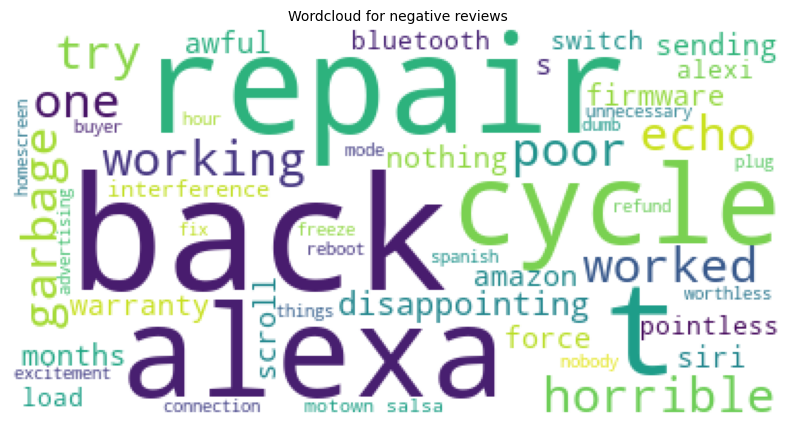

In [54]:
wc = WordCloud(background_color='white', max_words=50)

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

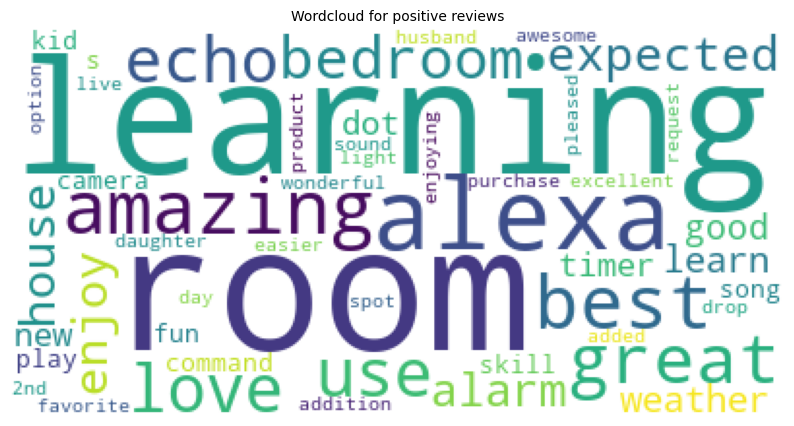

In [55]:
wc = WordCloud(background_color='white', max_words=50)

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()